## Build a Model

In [1]:
import pandas as pd
import numpy as np

In [4]:
test_data = pd.read_csv("../data/test.csv", index_col="index", low_memory=False)
train_data = pd.read_csv("../data/train.csv", index_col="index", low_memory=False)

### About the data

In [5]:
### How large is the training data set and the test data set?
print("test data size: ", test_data.shape)
print("train data size: ", train_data.shape)

test data size:  (171843, 62)
train data size:  (687369, 63)


In [6]:
### train data
train_data.target__office.value_counts()

target__office
False    681787
True       5582
Name: count, dtype: int64

# Features

## Baseline Model Review

In the provided baseline model, several ambiguous points require attention.

### Feature Selection:

- **Issue:** The reason for choosing specific columns as features is not clearly articulated.
  
- **Recommendation:** Begin by providing a rationale for the selection of these columns. Explain why each feature is relevant to the analysis, the problem at hand, or the domain.

### Missing Values Handling:

- **Issue:** Missing values (NaN) in the dataset have not been addressed.
  
- **Recommendation:** Implement a strategy for handling missing values, such as imputation or removal. Additionally, it's crucial to investigate whether the presence of NaN values conveys any meaningful information. Determine if the absence of data in certain columns holds significance and document your findings.

### Feature Engineering and Selection:

- **Issue:** The data analysis lacks a dedicated feature engineering and feature selection process.
  
- **Recommendation:** Explore and create new features that might enhance the model's predictive power. Additionally, consider employing techniques for feature selection to identify the most impactful variables. This step is essential for refining the model and improving its efficiency.


In [ ]:
### numerical features
train_data.select_dtypes(include="number").columns

In [ ]:
train_data[train_data.target__office == True]["officearea"].describe()

In [ ]:
train_data[train_data.target__office == True]["landuse"].value_counts()

In [ ]:
train_data[train_data.target__office == False]["officearea"].describe()

In [ ]:
train_data[train_data.target__office == False]["landuse"].value_counts()

# Train the Model

Upon examining the output of the `value_counts()` method applied to the target variable, a noticeable bias is observed between the counts of the two labels.

## Issue:

- **Imbalance in Target Variable:**
  The count distribution of the labels in the target variable reveals a significant bias.

## Recommendation:

- **Addressing Imbalance:**
  It's imperative to acknowledge and address the issue of imbalance in the target variable. Class imbalance can have adverse effects on model training and performance, especially in tasks like classification.

- **Potential Solutions:**
  - **Ensemble Different Resampled Datasets:**
    The easiest way to successfully generalize a model is by using more data. The problem is that out-of-the-box classifiers like logistic regression or random forest tend to generalize by discarding the rare class. One easy best practice is building n models that use all the samples of the rare class and n-differing samples of the abundant class.

  - **Resample with Different Ratios:**
    The previous approach can be fine-tuned by playing with the ratio between the rare and the abundant class.

  - **Other Approaches:**
    Explore various techniques to handle class imbalance, such as oversampling the minority class, undersampling the majority class, or using more advanced methods like SMOTE (Synthetic Minority Over-sampling Technique). Selecting an appropriate solution depends on the specific characteristics of the dataset and the problem at hand.


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
feature_cols = ["officearea", "comarea", "yearbuilt"]

In [9]:
X = train_data[feature_cols].copy(deep=True)
y = train_data["target__office"].copy(deep=True)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Parameter Selection Analysis

In the current implementation, there is a lack of clarity regarding the rationale behind choosing specific model parameters. It is crucial to provide a transparent justification for the selected parameters. Utilizing hyperparameter optimization techniques can enhance the model's performance and address the ambiguity in the parameter selection process.

### Issue:

- **Lack of Transparency in Model Parameters:**
  The reasoning behind the chosen model parameters is not clearly articulated, leading to uncertainty about their appropriateness for the given task.

### Recommendation:

- **Hyperparameter Optimization:**
  Consider employing hyperparameter optimization techniques to systematically search for the most suitable combination of model parameters. Techniques such as grid search, random search, or more advanced methods like Bayesian optimization can help identify optimal hyperparameter values.

- **Benefits of Optimization:**
  Hyperparameter optimization aims to enhance model performance by fine-tuning the parameters, leading to better generalization and improved results on unseen data. This process adds a layer of robustness to the model and ensures that it performs well across various scenarios.


In [11]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [12]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [13]:
y_hat = clf.predict(X_test)

# How does my model perform?

In the current model evaluation approach, there are issues with the choice of metrics. The use of misleading metrics, such as accuracy, and inappropriate metrics, such as Mean Squared Error (MSE), for a classification problem can lead to a distorted assessment of model performance. Upon inspecting the confusion matrix, it becomes evident that all minority labels are misclassified.

## Issues:

- **Misleading Metrics:**
  The use of accuracy as an evaluation metric can be misleading in the context of a classification problem, especially when dealing with imbalanced datasets. It does not provide a comprehensive understanding of the model's performance, particularly when one class significantly outweighs the other.

- **Inappropriate Metric (MSE) for Classification:**
  Mean Squared Error (MSE) is a metric commonly used for regression problems and is not suitable for evaluating the performance of a classification model. Its use in this context may lead to misinterpretation of the model's effectiveness.

- **Misclassification of Minority Labels:**
  Examination of the confusion matrix reveals that all minority labels are misclassified, indicating a specific problem with the model's ability to correctly identify instances of the minority class.

## Recommendation:

- **Use Appropriate Classification Metrics:**
  Opt for classification-specific metrics such as precision, recall, F1 score, or area under the ROC curve (AUC-ROC) to provide a more nuanced evaluation of the model's performance, especially in the presence of class imbalance.

- **Address Imbalanced Classes:**
  Implement strategies to address the misclassification of minority labels. Techniques such as adjusting class weights, using different evaluation thresholds, or employing resampling methods can help mitigate the impact of class imbalance.


In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [15]:
print("MSE:", mean_squared_error(y_test.astype(int), y_hat.astype(int)))
print("Accuracy:", accuracy_score(y_test.astype(int), y_hat.astype(int)))

MSE: 0.007833991676659378
Accuracy: 0.9921660083233407


0.9921660083233407


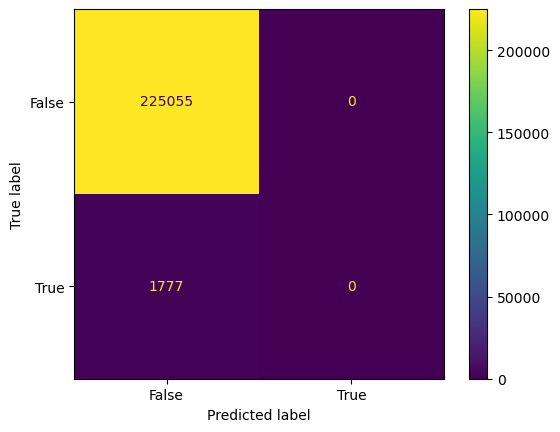

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(accuracy_score(y_test.astype(int), y_hat.astype(int)))
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()